<a href="https://colab.research.google.com/github/cortiz313/Machine-Learning-Class/blob/main/projects/Crate_and_Barrel_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crate and Barrel Project
By: Christian Ortiz and Sejal Nathu-Hari

Note: We did most of the work in collaboration at the same time, bouncing ideas off of one another and doing research together, so there wasn't much separation in the work. We did it all together.

## Approach #1 XGBoost (Worst Result = 32.276)

This approach did not work well, and left us with a 32.276 score on Kaggle

We knew we needed much lower, closer to 0.8, so we tried a different approach after this.

However, this first approach did give us a good insight into the data and helped us with the second approach

Below is the work we did for this first approach

### Setting Up The Environment

We need to import several libraries in order to follow this approach

In [4]:
# Importing necessary data analysis libraries
from pandas import DataFrame, Series    # For creating and manipulating data frames and series
import pandas as pd    # For data manipulation and analysis
import numpy as np    # For numerical computing and mathematical operations

# Importing necessary machine learning libraries
from sklearn.model_selection import train_test_split    # For splitting the data into training and testing sets
from sklearn.preprocessing import LabelEncoder    # For label encoding categorical variables
from sklearn.preprocessing import OneHotEncoder    # For one-hot encoding categorical variables
from sklearn import tree    # For decision tree learning
from sklearn.model_selection import GridSearchCV    # For performing grid search cross-validation
from xgboost import XGBClassifier    # For implementing the XGBoost algorithm
from sklearn.model_selection import StratifiedKFold    # For performing k-fold cross-validation
from sklearn.model_selection import RandomizedSearchCV    # For performing randomized search cross-validation
from sklearn.preprocessing import StandardScaler    # For standardizing numerical variables
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis    # For linear discriminant analysis
from sklearn.metrics import accuracy_score    # For evaluating the accuracy of the model
from sklearn.metrics import log_loss    # For evaluating the log loss of the model

### Reading the Data

Now we will read into our training and test variables and take a look at the data

In [5]:
# Read the test data into a variable test
test = pd.read_csv('test.csv')

# Read the train data into a variable train
train = pd.read_csv('train.csv')

Below we look at a description of the data

In [ ]:
# gives a description of the data with stats
train.describe()

In [ ]:
test.describe()

Below we take a look at the actual data

In [ ]:
# take a look at the first few of the actual data
train.head()

In [ ]:
test.head()

### Preparing the Test and Train data

Now we will start separating the data into data structures we can work with in our classifying steps

In [10]:
# Creating a new data frame with all features except the target variable
trainF = train.drop('target', axis=1)

# Creating a new data frame with only the target variable
trainL = train['target']

# Creating a list of the unique classes in the target variable
classes = np.unique(trainL)

In [11]:
# taking a look at the classes
classes

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

In [12]:
# putting the test ids in their own data frame
testIDs=test['id'];

Here we split the training data into training and validation sets for training the model later

In [13]:
# Splitting the data into training and validation sets
train_features,valid_features,train_labels,valid_labels = train_test_split(trainF,trainL, test_size=0.2)

Below I drop the id column from the features of both

In [14]:
train_features = train_features.drop('id', axis=1)

In [15]:
valid_features = valid_features.drop('id', axis=1)

The code below was just to check if there where any features where the value was less than 0, we didn't find any

In [17]:
if np.any(train_features < 0):
    print("The numpy array contains negative numbers.")
else:
    print("The numpy array does not contain negative numbers.")

The numpy array does not contain negative numbers.


Here we scale the feature values from 0 to 1 for better processing

In [18]:
# Creating a StandardScaler object to scale the features
scaler = StandardScaler()

# Scaling the training features using the scaler object
train_features = scaler.fit_transform(train_features)

# Scaling the validation features using the scaler object
valid_features = scaler.transform(valid_features)

In [19]:
# taking a look at the data again
valid_features.shape

(12376, 93)

In [20]:
train_features.shape

(49502, 93)

We want to use the classes dataframe later so here we sort them out

In [21]:
# Creating a data frame with the count of each class in the training labels
unsorted_classes = pd.DataFrame(train_labels.value_counts())

# Sorting the classes in ascending order and assigning the result to a new data frame
sorted_classes = unsorted_classes.sort_index(axis=0)

# Getting the list of sorted class names from the index of the sorted_classes data frame
sorted_classes.index

Index(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'],
      dtype='object')

### Encoding the data

Now we will encode the labels so they work with the XGBoost model later

In [22]:
# Creating a LabelEncoder object to encode the labels
le = LabelEncoder()

# Encoding the training labels using the LabelEncoder object
train_labels_le = le.fit_transform(train_labels)

# Encoding the validation labels using the LabelEncoder object
valid_labels_le = le.transform(valid_labels)

### Creating and fitting the model

Now we will create the model and fit it with our data

Below we set the hyperparameters of the model. We performed some tests previously with RandomSearch, and found n_estimators = 400 and max_depth = 8 to be the best hyperparameters. We found the objective through research online.

In [23]:
# Setting the parameters for the XGBoost classifier
params = {'tree_method':'gpu_hist', 'predictor':'gpu_predictor', 'n_estimators': 500, 'max_depth' : 8,  'objective':'multi:softprob'}

# Creating a new XGBoost classifier object with the specified parameters
model = XGBClassifier(**params)

Below we fit the model

In [24]:
# Fitting the XGBoost classifier to the training data
model.fit(train_features, train_labels_le)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor='gpu_predictor', ...)

### Validation Predictions

Now we will check the predictions and accuracy on our validation data 

In [25]:
# Using the trained XGBoost classifier to predict the labels for the validation features
valid_predictions = model.predict(valid_features)

In [26]:
# Calculating the accuracy score of the XGBoost classifier on the validation data
print('Accuracy Score = ', accuracy_score(valid_labels_le,valid_predictions))

Accuracy Score =  0.8278118939883645


We got an 82.78% accuracy on our validation data

### Final Predictions

Now we will get the predictions on our test data, and set up our final dataframe with all this information so it can be output as a CSV file

In [27]:
# Removing the 'id' column from the test data
# We do this so we can transform the data, we will add the ids back later with the testIDs dataframe
test.drop('id', axis=1, inplace=True)

We now scale the test features in the same way we did with the training_features

In [28]:
# Scaling the test data using the trained StandardScaler
test = scaler.transform(test)

Below we use our model to predict the test data, and immediately put that into a dataframe

In [30]:
# Creating a DataFrame to store the test data predictions
predictions_df = pd.DataFrame(model.predict(test))

Now we take a look at the dataframe to see what it looks like

In [31]:
# Displaying the first few rows of the predictions DataFrame
predictions_df.head()

,0
0,3
1,7
2,5
3,1
4,8


### Setting up DataFrame for export

Below we will manipulate the dataframes to be ready for export

We will One Hot Encode the predictions so we can have a binary assignment of 0 or 1 for each class at each row

In [32]:
# One-hot encoding the predicted classes
df_encoded = pd.get_dummies(predictions_df.iloc[:, 0], prefix='Class')

In [33]:
# Reorder the columns to match the column order we want
df_encoded = df_encoded.reindex(columns=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6', 'Class_7', 'Class_8', 'Class_9'])

In [34]:
df_encoded.head()

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0,0,1,0,0,0,0,0,NaN
1,0,0,0,0,0,0,1,0,NaN
2,0,0,0,0,1,0,0,0,NaN
3,1,0,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,1,NaN


We notice class 9 is full of NaN values, so we check if the previous predictions_df had any predictions of a class 9

In [35]:
# checking if there is any row with a value of 9
if (predictions_df.loc[predictions_df.iloc[:,0] == 9]).any().any():
    print("At least one row has a value of 9.")
else:
    print("No row has a value of 9.")

No row has a value of 9.


We don't see any, so continue and simply assign all of the NaN values to 0

In [36]:
# Filling any NaN values with 0
df_encoded = df_encoded.fillna(value=0)

In [37]:
df_encoded.head()

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0,0,1,0,0,0,0,0,0.0
1,0,0,0,0,0,0,1,0,0.0
2,0,0,0,0,1,0,0,0,0.0
3,1,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,1,0.0


Now we just need to add the ids back to this dataframe

In [38]:
# Concatenating the test IDs and the encoded predictions
final_predictions = pd.concat((testIDs,df_encoded),axis=1)

In [39]:
final_predictions.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0,0,1,0,0,0,0,0,0.0
1,2,0,0,0,0,0,0,1,0,0.0
2,3,0,0,0,0,1,0,0,0,0.0
3,4,1,0,0,0,0,0,0,0,0.0
4,5,0,0,0,0,0,0,0,1,0.0


In [40]:
# Exporting the final predictions to a CSV file
final_predictions.to_csv('sub.csv',index=False,header=1)

With this approach we got a result of 32.276

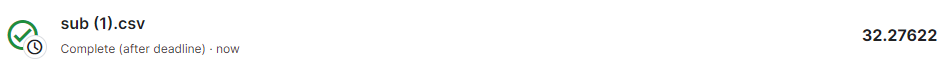

As we mentioned before, our result from this wasn't very good, so we tried a different approach

## Approach #2 Random Forest (Best Result = 0.56682)

Part of the error we found was that we realized that perhaps having a binary distinction for each class was probably part of the error, and we wanted to have continuous values instead. 

We also decided to try to use decision trees, and more particularly a random forest classifier, as it is an ensemble method of using decision trees. After some research we felt that this would be a more appropriate way to go about this

Since we already had a pretty good idea of the data from the previous method, it enabled to work a bit faster on this approach

### Setting up the environment

In [41]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

## Loading and Preparing the Data

On this approach, we decided to map the classes to numbers on our own, as we felt that might have been part of the issue previously when we had all NaN values for class 9

In [42]:
# Load training and test data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Get target and id columns from training data and convert target values to numeric
train_target = train_data[["target","id"]]
train_data = train_data.drop(["target", "id"], axis=1)

# This line creates a dictionary that maps each target class to a numeric value
class_names = {"Class_1": 1, "Class_2": 2, "Class_3": 3, "Class_4": 4, "Class_5": 5, "Class_6": 6, "Class_7": 7, "Class_8": 8, "Class_9": 9}

# Here we map the target labels to numeric values for classification, using a dictionary and the apply method on the "target" column of the train_target df.
# The numeric values are stored in the "train_target_numeric" variable.
train_target_numeric = train_target["target"].apply(lambda x: class_names[x])

## GridSearch

We found an approach through some research to help us create a successful classifier. In the sklearn modules there is a class you can use called Recursive Feature Elimination. This class is a feature selection method that selects features by recursively considering smaller and smaller sets of features. It starts by training a model on the full set of features and then ranking the importance of each feature based on a specified metric, like accuracy or something else.

We decided to use this method for our process, however there is a hyperparameter called n_features_to_select and we did not know what number to choose for this, so we ran a GridSearch on it. It took well over an hour, and we have to keep the param grid small to test it properly. Below is where we did this

We also tested the n_estimators for the Random Forest Classifier in this Grid Search

We commented it out as we found the appropriate parameters and did not want to run the Grid Search again.

In [43]:
# Create a random forest classifier
#clf = RandomForestClassifier(n_jobs=-1)

# Set up the parameter grid to search for best params 
# param_grid = {
#     "estimator__n_estimators": [50, 250],
#     "n_features_to_select": [50, 80]
# }

# # Create a recursive feature elimination (RFE) object that will select the top features
# # based on the feature importances returned by the random forest classifier
# rfe = RFE(estimator=clf)

# # Create a grid search object that will search over the parameter grid
# grid_search = GridSearchCV(rfe, param_grid=param_grid, cv=5, n_jobs=-1)

# # Fit the grid search object to the training set to find the best values for the parameters
# grid_search.fit(train_data, train_target_numeric)

# # Print the best parameters found during the grid search
# print("Best parameters: ", grid_search.best_params_)

# Found best params to be n_estimators = 250, n_features_to_select = 80


## Creating and Fitting the Random Forest Classifier

Based on the information from the grid search, we create the classifier and the recursive feature elimination object and fit it with the training data

In [45]:
# Extract the best values of the parameters from the grid search object
best_n_estimators = 250
best_n_features = 80

# Create a new random forest classifier with the optimal number of trees
clf = RandomForestClassifier(n_estimators=best_n_estimators, n_jobs=-1)

# Create a recursive feature elimination (RFE) object that will select the top features
# based on the feature importances returned by the random forest classifier
rfe = RFE(estimator=clf, n_features_to_select=best_n_features)

# Fit the RFE object to the training set to select the top features
fit = rfe.fit(train_data, train_target_numeric)


## Final Predictions and setting up the final dataframe for submission

Below we remove the test Id again as we did in the XGBoost method and keep them for later so we can run the prediction on the test data

In [46]:
# Save the ids from the test data to a separate variable
test_ids = test_data["id"]
test_ids = pd.DataFrame(test_ids, columns=["id"])

# Drop the "id" column from the test data
test_data = test_data.drop("id", axis=1)

Here we get our prediction probabilities for our test data and put it into a dataframe called test_probabilities

In [47]:
# Use the fitted RFE object to predict the class probabilities for the testing set for each of the 9 classes
test_probabilities = fit.predict_proba(test_data)

And now we take the probabilities and put them in a dataframe with the Class names as columns

In [48]:
test_probabilities_df = pd.DataFrame(test_probabilities, columns=["Class_1", "Class_2", "Class_3", "Class_4", "Class_5", "Class_6", "Class_7", "Class_8", "Class_9"])

In [49]:
test_probabilities_df.head()

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0.024,0.208,0.240,0.444,0.004,0.024,0.036,0.012,0.008
1,0.020,0.040,0.032,0.008,0.008,0.556,0.028,0.300,0.008
2,0.000,0.004,0.000,0.000,0.000,0.988,0.000,0.008,0.000
3,0.004,0.572,0.300,0.056,0.000,0.008,0.012,0.004,0.044
4,0.108,0.008,0.000,0.000,0.004,0.028,0.032,0.256,0.564


## Creating our Submission File

Finally we concatenate the testIds to our dataframe and send it to a CSV file for submission

In [50]:
# Combine the predicted class probabilities with the ids for the testing set
submission_df = pd.concat([test_ids, test_probabilities_df], axis=1)

# Save the results to a CSV file
submission_df.to_csv("final_submission.csv", sep=",", index=None)

With this, we were able to achieve a score of 0.567

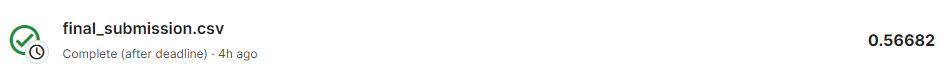

As you can see, our score was astronomically better with this approach, and we think it had alot to do with having probabilities instead of binary values in our final predictions dataframe. Overall, we learned alot and were very happy with the score we were able to achieve.